In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
points_2011 = pd.read_csv(f"../data/grand-slam-point-data/combined-points/2011-combined-points.csv", encoding='unicode_escape', low_memory=False)
match_2011 = pd.read_csv(f"../data/grand-slam-point-data/combined-matches/2011-combined-matches.csv", encoding='unicode_escape', low_memory=False)
combined = pd.merge(points_2011, match_2011, on="match_id", how="inner")
for i in range(2012, 2022):
    points = pd.read_csv(f"../data/grand-slam-point-data/combined-points/{i}-combined-points.csv", encoding='unicode_escape', low_memory=False)
    match = pd.read_csv(f"../data/grand-slam-point-data/combined-matches/{i}-combined-matches.csv", encoding='unicode_escape', low_memory=False)
    cur_year = pd.merge(points, match, on="match_id", how="inner")
    combined = pd.concat([combined, cur_year], sort=True)

points = combined
points = points[
    ["match_id", "SetNo", "P1GamesWon", "P2GamesWon", "GameNo", "GameWinner", "PointNumber", "PointWinner", "PointServer", "P1Score",
    "P2Score", "P1Winner", "P2Winner", "P1DoubleFault", "P2DoubleFault", "P1UnfErr", "P2UnfErr", "P1BreakPoint", "P2BreakPoint", "player1_new", "player2_new", "P1NetPoint", "P2NetPoint", "P1NetPointWon", "P2NetPointWon"]
].dropna(how="any")
points = points.reset_index(drop=True)
points

,match_id,SetNo,P1GamesWon,P2GamesWon,GameNo,GameWinner,PointNumber,PointWinner,PointServer,P1Score,...,P1UnfErr,P2UnfErr,P1BreakPoint,P2BreakPoint,player1_new,player2_new,P1NetPoint,P2NetPoint,P1NetPointWon,P2NetPointWon
0,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,R Nadal,M Daniel,0.0,0.0,0.0,0.0
1,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,1,1.0,2.0,15,...,0.0,1.0,0.0,0.0,R Nadal,M Daniel,0.0,0.0,0.0,0.0
2,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,2,1.0,2.0,30,...,0.0,1.0,0.0,0.0,R Nadal,M Daniel,0.0,0.0,0.0,0.0
3,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,3,1.0,2.0,40,...,0.0,1.0,0.0,0.0,R Nadal,M Daniel,0.0,0.0,0.0,0.0
4,2011-ausopen-1101,1.0,1.0,0.0,1.0,1.0,4,1.0,2.0,0,...,0.0,1.0,1.0,0.0,R Nadal,M Daniel,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792718,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,272,2.0,2.0,40,...,0.0,0.0,1.0,0.0,N Djokovic,M Berrettini,0.0,1.0,0.0,1.0
792719,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,273,1.0,2.0,AD,...,0.0,0.0,0.0,0.0,N Djokovic,M Berrettini,1.0,0.0,1.0,0.0
792720,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,274,2.0,2.0,40,...,0.0,0.0,1.0,0.0,N Djokovic,M Berrettini,0.0,0.0,0.0,0.0
792721,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,275,1.0,2.0,AD,...,0.0,1.0,0.0,0.0,N Djokovic,M Berrettini,0.0,0.0,0.0,0.0


In [3]:
points2 = pd.read_csv(f"../data/points-pressure.csv", encoding='unicode_escape', low_memory=False)
points3 = points2[["P1Errors", "P2Errors", "P1Pressure", "P2Pressure"]]
points3

,P1Errors,P2Errors,P1Pressure,P2Pressure
0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0
...,...,...,...,...
792718,0.0,0.0,1.0,3.0
792719,0.0,0.0,1.0,3.0
792720,0.0,0.0,1.0,3.0
792721,0.0,1.0,1.0,3.0


In [4]:
points_new = pd.concat([points, points3], axis=1)
points_new

,match_id,SetNo,P1GamesWon,P2GamesWon,GameNo,GameWinner,PointNumber,PointWinner,PointServer,P1Score,...,player1_new,player2_new,P1NetPoint,P2NetPoint,P1NetPointWon,P2NetPointWon,P1Errors,P2Errors,P1Pressure,P2Pressure
0,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0,...,R Nadal,M Daniel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,1,1.0,2.0,15,...,R Nadal,M Daniel,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,2,1.0,2.0,30,...,R Nadal,M Daniel,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,3,1.0,2.0,40,...,R Nadal,M Daniel,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2011-ausopen-1101,1.0,1.0,0.0,1.0,1.0,4,1.0,2.0,0,...,R Nadal,M Daniel,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792718,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,272,2.0,2.0,40,...,N Djokovic,M Berrettini,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0
792719,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,273,1.0,2.0,AD,...,N Djokovic,M Berrettini,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
792720,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,274,2.0,2.0,40,...,N Djokovic,M Berrettini,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
792721,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,275,1.0,2.0,AD,...,N Djokovic,M Berrettini,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0


In [5]:
table1 = points_new.loc[(points_new['player1_new'] == 'R Nadal') | (points_new['player2_new'] == 'R Nadal') & (points_new['SetNo'] == 1.0)]
table2 = points_new.loc[(((points_new['player1_new'] == 'R Nadal') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 1.0)]
print(len(table1), len(table2))

table3 = points_new.loc[(points_new['player1_new'] == 'R Nadal') | (points_new['player2_new'] == 'R Nadal') & (points_new['SetNo'] == 2.0)]
table4 = points_new.loc[(((points_new['player1_new'] == 'R Nadal') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 2.0)]
print(len(table3), len(table4))

table5 = points_new.loc[(points_new['player1_new'] == 'R Nadal') | (points_new['player2_new'] == 'R Nadal') & (points_new['SetNo'] == 3.0)]
table6 = points_new.loc[(((points_new['player1_new'] == 'R Nadal') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 3.0)]
print(len(table5), len(table6))

table7 = points_new.loc[(points_new['player1_new'] == 'R Nadal') | (points_new['player2_new'] == 'R Nadal') & (points_new['SetNo'] == 4.0)]
table8 = points_new.loc[(((points_new['player1_new'] == 'R Nadal') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 4.0)]
print(len(table7), len(table8))

table9 = points_new.loc[(points_new['player1_new'] == 'R Nadal') | (points_new['player2_new'] == 'R Nadal') & (points_new['SetNo'] == 5.0)]
table10 = points_new.loc[(((points_new['player1_new'] == 'R Nadal') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 5.0)]
print(len(table9), len(table10))

plot2 = points_new.loc[(((points_new['player1_new'] == 'R Nadal') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 1.0)]
print(len(table1), len(plot2))

plot4 = points_new.loc[(((points_new['player1_new'] == 'R Nadal') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 2.0)]
print(len(table3), len(plot4))

plot6 = points_new.loc[(((points_new['player1_new'] == 'R Nadal') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 3.0)]
print(len(table5), len(plot6))

plot8 = points_new.loc[(((points_new['player1_new'] == 'R Nadal') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 4.0)]
print(len(table7), len(plot8))

plot10 = points_new.loc[(((points_new['player1_new'] == 'R Nadal') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 5.0)]
print(len(table9), len(plot10))

17984 1079
17419 910
17563 874
14816 293
14008 141
17984 1334
17419 1364
17563 1366
14816 484
14008 224


In [6]:
player11 = points_new.loc[((points_new['player1_new'] == 'R Nadal')  & (points_new['P1NetPoint'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2NetPoint'] == 1.0)) & (points_new['SetNo'] == 1.0)]
player12 = points_new.loc[((points_new['player1_new'] == 'R Nadal')  & (points_new['P1NetPoint'] == 1.0) & (points_new['P1NetPointWon'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2NetPoint'] == 1.0) & (points_new['P2NetPointWon'] == 1.0)) & (points_new['SetNo'] == 1.0)]
print(len(player11), len(player12))

player13 = points_new.loc[((points_new['player1_new'] == 'R Nadal')  & (points_new['P1NetPoint'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2NetPoint'] == 1.0)) & (points_new['SetNo'] == 2.0)]
player14 = points_new.loc[((points_new['player1_new'] == 'R Nadal')  & (points_new['P1NetPoint'] == 1.0) & (points_new['P1NetPointWon'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2NetPoint'] == 1.0) & (points_new['P2NetPointWon'] == 1.0)) & (points_new['SetNo'] == 2.0)]
print(len(player13), len(player14))

player15 = points_new.loc[((points_new['player1_new'] == 'R Nadal')  & (points_new['P1NetPoint'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2NetPoint'] == 1.0)) & (points_new['SetNo'] == 2.0)]
player16 = points_new.loc[((points_new['player1_new'] == 'R Nadal')  & (points_new['P1NetPoint'] == 1.0) & (points_new['P1NetPointWon'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2NetPoint'] == 1.0) & (points_new['P2NetPointWon'] == 1.0)) & (points_new['SetNo'] == 3.0)]
print(len(player15), len(player16))

player17 = points_new.loc[((points_new['player1_new'] == 'R Nadal')  & (points_new['P1NetPoint'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2NetPoint'] == 1.0)) & (points_new['SetNo'] == 4.0)]
player18 = points_new.loc[((points_new['player1_new'] == 'R Nadal')  & (points_new['P1NetPoint'] == 1.0) & (points_new['P1NetPointWon'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2NetPoint'] == 1.0) & (points_new['P2NetPointWon'] == 1.0)) & (points_new['SetNo'] == 4.0)]
print(len(player17), len(player18))

player19 = points_new.loc[((points_new['player1_new'] == 'R Nadal')  & (points_new['P1NetPoint'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2NetPoint'] == 1.0)) & (points_new['SetNo'] == 5.0)]
player110 = points_new.loc[((points_new['player1_new'] == 'R Nadal')  & (points_new['P1NetPoint'] == 1.0) & (points_new['P1NetPointWon'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2NetPoint'] == 1.0) & (points_new['P2NetPointWon'] == 1.0)) & (points_new['SetNo'] == 5.0)]
print(len(player19), len(player110))

1381 1092
1404 1110
1404 1098
1185 927
1115 872


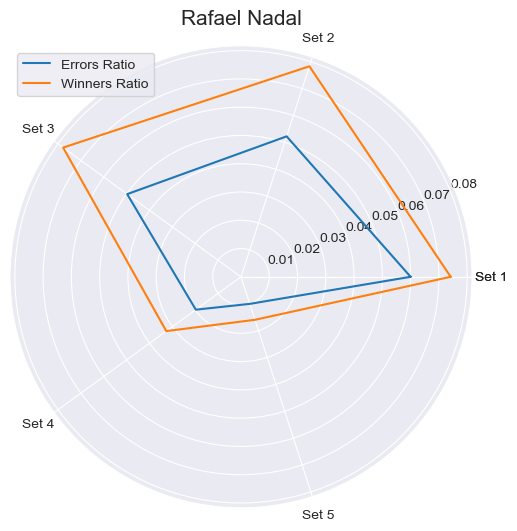

In [7]:
categories = ['Set 1', 'Set 2', 'Set 3', 'Set 4', 'Set 5']
categories = [*categories, categories[0]]

plotstat_1 = [len(table2)/len(table1), len(table4)/len(table3), len(table6)/len(table5), len(table8)/len(table7), len(table10)/len(table9)]
plotstat_2 = [len(plot2)/len(table1), len(plot4)/len(table3), len(plot6)/len(table5), len(plot8)/len(table7), len(plot10)/len(table9)]
#plotstat_3 = [len(player12)/len(player11), len(player14)/len(player13), len(player16)/len(player15), len(player18)/len(player17), len(player110)/len(player19)]
plotstat_1 = [*plotstat_1, plotstat_1[0]]
plotstat_2 = [*plotstat_2, plotstat_2[0]]
#plotstat_3 = [*plotstat_3, plotstat_2[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(plotstat_1))

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)
plt.plot(label_loc, plotstat_1, label='Errors Ratio')
plt.plot(label_loc, plotstat_2, label='Winners Ratio')
#plt.plot(label_loc, plotstat_3, label='Net Points Ratio')
plt.title('Rafael Nadal', size=15)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
#plt.savefig("../plots/stat_nadal.png")
plt.show()


In [8]:
print(len(table2)/len(table1), len(table4)/len(table3), len(table6)/len(table5), len(table8)/len(table7), len(table10)/len(table9))

print(len(plot2)/len(table1), len(plot4)/len(table3), len(plot6)/len(table5), len(plot8)/len(table7), len(plot10)/len(table9))

#print(len(player12)/len(player11), len(player14)/len(player13), len(player16)/len(player15), len(player18)/len(player17), len(player110)/len(player19))

0.05999777580071174 0.052241804925655895 0.04976370779479588 0.019775917926565873 0.010065676756139348
0.07417704626334519 0.07830529881164246 0.07777714513465808 0.03266738660907127 0.01599086236436322


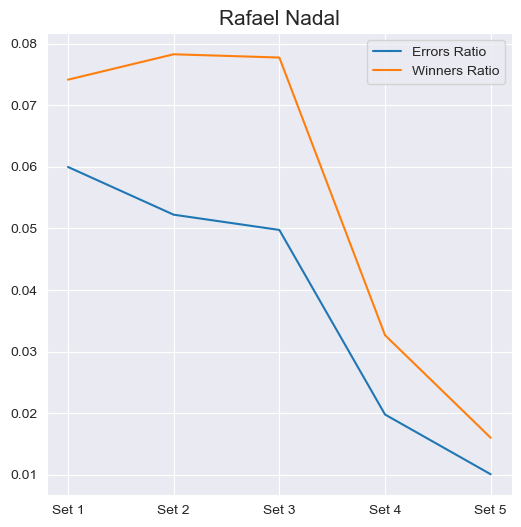

In [9]:
categories = ['Set 1', 'Set 2', 'Set 3', 'Set 4', 'Set 5']
plotstat_1 = [len(table2)/len(table1), len(table4)/len(table3), len(table6)/len(table5), len(table8)/len(table7), len(table10)/len(table9)]
plotstat_2 = [len(plot2)/len(table1), len(plot4)/len(table3), len(plot6)/len(table5), len(plot8)/len(table7), len(plot10)/len(table9)]
plt.figure(figsize=(6, 6))
plt.title('Rafael Nadal', size=15)
plt.plot(categories, plotstat_1, label='Errors Ratio')
plt.plot(categories, plotstat_2, label='Winners Ratio')
plt.legend()
plt.show()

In [10]:
points_new.loc[points_new['P1Pressure'] == 5.0, "P1Pressure"] = 4.0
points_new.loc[points_new['P2Pressure'] == 5.0, "P2Pressure"] = 4.0

In [11]:
points_new

,match_id,SetNo,P1GamesWon,P2GamesWon,GameNo,GameWinner,PointNumber,PointWinner,PointServer,P1Score,...,player1_new,player2_new,P1NetPoint,P2NetPoint,P1NetPointWon,P2NetPointWon,P1Errors,P2Errors,P1Pressure,P2Pressure
0,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0,...,R Nadal,M Daniel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,1,1.0,2.0,15,...,R Nadal,M Daniel,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,2,1.0,2.0,30,...,R Nadal,M Daniel,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,3,1.0,2.0,40,...,R Nadal,M Daniel,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2011-ausopen-1101,1.0,1.0,0.0,1.0,1.0,4,1.0,2.0,0,...,R Nadal,M Daniel,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792718,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,272,2.0,2.0,40,...,N Djokovic,M Berrettini,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0
792719,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,273,1.0,2.0,AD,...,N Djokovic,M Berrettini,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
792720,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,274,2.0,2.0,40,...,N Djokovic,M Berrettini,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
792721,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,275,1.0,2.0,AD,...,N Djokovic,M Berrettini,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0


In [17]:
table1 = points_new.loc[((points_new['P1Pressure'] == 0.0) & (points_new['player1_new'] == 'C Ruud')) | ((points_new['P2Pressure'] == 0.0) & (points_new['player2_new'] == 'C Ruud'))]
table2 = points_new.loc[((points_new['P1Pressure'] == 0.0) & (points_new['P1Errors'] == 1.0) & (points_new['player1_new'] == 'C Ruud')) | ((points_new['P2Pressure'] == 0.0) & (points_new['P2Errors'] == 1.0)  & (points_new['player2_new'] == 'C Ruud'))]
print(len(table1), len(table2))

table3 = points_new.loc[((points_new['P1Pressure'] == 1.0) & (points_new['player1_new'] == 'C Ruud')) | ((points_new['P2Pressure'] == 1.0) & (points_new['player2_new'] == 'C Ruud'))]
table4 = points_new.loc[((points_new['P1Pressure'] == 1.0) & (points_new['P1Errors'] == 1.0) & (points_new['player1_new'] == 'C Ruud')) | ((points_new['P2Pressure'] == 1.0) & (points_new['P2Errors'] == 1.0)  & (points_new['player2_new'] == 'C Ruud'))]
print(len(table3), len(table4))

table5 = points_new.loc[((points_new['P1Pressure'] == 2.0) & (points_new['player1_new'] == 'C Ruud')) | ((points_new['P2Pressure'] == 2.0) & (points_new['player2_new'] == 'C Ruud'))]
table6 = points_new.loc[((points_new['P1Pressure'] == 2.0) & (points_new['P1Errors'] == 1.0) & (points_new['player1_new'] == 'C Ruud')) | ((points_new['P2Pressure'] == 2.0) & (points_new['P2Errors'] == 1.0)  & (points_new['player2_new'] == 'C Ruud'))]
print(len(table5), len(table6))

table7 = points_new.loc[((points_new['P1Pressure'] == 3.0) & (points_new['player1_new'] == 'C Ruud')) | ((points_new['P2Pressure'] == 3.0) & (points_new['player2_new'] == 'C Ruud'))]
table8 = points_new.loc[((points_new['P1Pressure'] == 3.0) & (points_new['P1Errors'] == 1.0) & (points_new['player1_new'] == 'C Ruud')) | ((points_new['P2Pressure'] == 3.0) & (points_new['P2Errors'] == 1.0)  & (points_new['player2_new'] == 'C Ruud'))]
print(len(table7), len(table8))

table9 = points_new.loc[((points_new['P1Pressure'] == 4.0) & (points_new['player1_new'] == 'C Ruud')) | ((points_new['P2Pressure'] == 4.0) & (points_new['player2_new'] == 'C Ruud'))]
table10 = points_new.loc[((points_new['P1Pressure'] == 4.0) & (points_new['P1Errors'] == 1.0) & (points_new['player1_new'] == 'C Ruud')) | ((points_new['P2Pressure'] == 4.0) & (points_new['P2Errors'] == 1.0)  & (points_new['player2_new'] == 'C Ruud'))]
print(len(table9), len(table10))

958 117
550 79
199 42
30 6
3 1


In [18]:
plot1 = points_new.loc[((points_new['P1Pressure'] == 0.0) & (points_new['player1_new'] == 'N Djokovic')) | ((points_new['P2Pressure'] == 0.0) & (points_new['player2_new'] == 'N Djokovic'))]
plot2 = points_new.loc[((points_new['P1Pressure'] == 0.0) & (points_new['P1Errors'] == 1.0) & (points_new['player1_new'] == 'N Djokovic')) | ((points_new['P2Pressure'] == 0.0) & (points_new['P2Errors'] == 1.0)  & (points_new['player2_new'] == 'N Djokovic'))]
print(len(plot1), len(plot2))

plot3 = points_new.loc[((points_new['P1Pressure'] == 1.0) & (points_new['player1_new'] == 'N Djokovic')) | ((points_new['P2Pressure'] == 1.0) & (points_new['player2_new'] == 'N Djokovic'))]
plot4 = points_new.loc[((points_new['P1Pressure'] == 1.0) & (points_new['P1Errors'] == 1.0) & (points_new['player1_new'] == 'N Djokovic')) | ((points_new['P2Pressure'] == 1.0) & (points_new['P2Errors'] == 1.0)  & (points_new['player2_new'] == 'N Djokovic'))]
print(len(plot3), len(plot4))

plot5 = points_new.loc[((points_new['P1Pressure'] == 2.0) & (points_new['player1_new'] == 'N Djokovic')) | ((points_new['P2Pressure'] == 2.0) & (points_new['player2_new'] == 'N Djokovic'))]
plot6 = points_new.loc[((points_new['P1Pressure'] == 2.0) & (points_new['P1Errors'] == 1.0) & (points_new['player1_new'] == 'N Djokovic')) | ((points_new['P2Pressure'] == 2.0) & (points_new['P2Errors'] == 1.0)  & (points_new['player2_new'] == 'N Djokovic'))]
print(len(plot5), len(plot6))

plot7 = points_new.loc[((points_new['P1Pressure'] == 3.0) & (points_new['player1_new'] == 'N Djokovic')) | ((points_new['P2Pressure'] == 3.0) & (points_new['player2_new'] == 'N Djokovic'))]
plot8 = points_new.loc[((points_new['P1Pressure'] == 3.0) & (points_new['P1Errors'] == 1.0) & (points_new['player1_new'] == 'N Djokovic')) | ((points_new['P2Pressure'] == 3.0) & (points_new['P2Errors'] == 1.0)  & (points_new['player2_new'] == 'N Djokovic'))]
print(len(plot7), len(plot8))

plot9 = points_new.loc[((points_new['P1Pressure'] == 4.0) & (points_new['player1_new'] == 'N Djokovic')) | ((points_new['P2Pressure'] == 4.0) & (points_new['player2_new'] == 'N Djokovic'))]
plot10 = points_new.loc[((points_new['P1Pressure'] == 4.0) & (points_new['P1Errors'] == 1.0) & (points_new['player1_new'] == 'N Djokovic')) | ((points_new['P2Pressure'] == 4.0) & (points_new['P2Errors'] == 1.0)  & (points_new['player2_new'] == 'N Djokovic'))]
print(len(plot9), len(plot10))

26407 3020
11483 1886
3926 775
449 56
25 1


In [19]:
more1 = points_new.loc[((points_new['P1Pressure'] == 0.0) & (points_new['player1_new'] == 'R Federer')) | ((points_new['P2Pressure'] == 0.0) & (points_new['player2_new'] == 'R Federer'))]
more2 = points_new.loc[((points_new['P1Pressure'] == 0.0) & (points_new['P1Errors'] == 1.0) & (points_new['player1_new'] == 'R Federer')) | ((points_new['P2Pressure'] == 0.0) & (points_new['P2Errors'] == 1.0)  & (points_new['player2_new'] == 'R Federer'))]
print(len(more1), len(more2))

more3 = points_new.loc[((points_new['P1Pressure'] == 1.0) & (points_new['player1_new'] == 'R Federer')) | ((points_new['P2Pressure'] == 1.0) & (points_new['player2_new'] == 'R Federer'))]
more4 = points_new.loc[((points_new['P1Pressure'] == 1.0) & (points_new['P1Errors'] == 1.0) & (points_new['player1_new'] == 'R Federer')) | ((points_new['P2Pressure'] == 1.0) & (points_new['P2Errors'] == 1.0)  & (points_new['player2_new'] == 'R Federer'))]
print(len(more3), len(more4))

more5 = points_new.loc[((points_new['P1Pressure'] == 2.0) & (points_new['player1_new'] == 'R Federer')) | ((points_new['P2Pressure'] == 2.0) & (points_new['player2_new'] == 'R Federer'))]
more6 = points_new.loc[((points_new['P1Pressure'] == 2.0) & (points_new['P1Errors'] == 1.0) & (points_new['player1_new'] == 'R Federer')) | ((points_new['P2Pressure'] == 2.0) & (points_new['P2Errors'] == 1.0)  & (points_new['player2_new'] == 'R Federer'))]
print(len(more5), len(more6))

more7 = points_new.loc[((points_new['P1Pressure'] == 3.0) & (points_new['player1_new'] == 'R Federer')) | ((points_new['P2Pressure'] == 3.0) & (points_new['player2_new'] == 'R Federer'))]
more8 = points_new.loc[((points_new['P1Pressure'] == 3.0) & (points_new['P1Errors'] == 1.0) & (points_new['player1_new'] == 'R Federer')) | ((points_new['P2Pressure'] == 3.0) & (points_new['P2Errors'] == 1.0)  & (points_new['player2_new'] == 'R Federer'))]
print(len(more7), len(more8))

more9 = points_new.loc[((points_new['P1Pressure'] == 4.0) & (points_new['player1_new'] == 'R Federer')) | ((points_new['P2Pressure'] == 4.0) & (points_new['player2_new'] == 'R Federer'))]
more10 = points_new.loc[((points_new['P1Pressure'] == 4.0) & (points_new['P1Errors'] == 1.0) & (points_new['player1_new'] == 'R Federer')) | ((points_new['P2Pressure'] == 4.0) & (points_new['P2Errors'] == 1.0)  & (points_new['player2_new'] == 'R Federer'))]
print(len(more9), len(more10))

21258 2479
9155 1484
3094 618
340 52
16 0


In [21]:
extra1 = points_new.loc[((points_new['P1Pressure'] == 0.0) & (points_new['player1_new'] == 'M Klizan')) | ((points_new['P2Pressure'] == 0.0) & (points_new['player2_new'] == 'M Klizan'))]
extra2 = points_new.loc[((points_new['P1Pressure'] == 0.0) & (points_new['P1Errors'] == 1.0) & (points_new['player1_new'] == 'M Klizan')) | ((points_new['P2Pressure'] == 0.0) & (points_new['P2Errors'] == 1.0)  & (points_new['player2_new'] == 'M Klizan'))]
print(len(extra1), len(extra2))

extra3 = points_new.loc[((points_new['P1Pressure'] == 1.0) & (points_new['player1_new'] == 'M Klizan')) | ((points_new['P2Pressure'] == 1.0) & (points_new['player2_new'] == 'M Klizan'))]
extra4 = points_new.loc[((points_new['P1Pressure'] == 1.0) & (points_new['P1Errors'] == 1.0) & (points_new['player1_new'] == 'M Klizan')) | ((points_new['P2Pressure'] == 1.0) & (points_new['P2Errors'] == 1.0)  & (points_new['player2_new'] == 'M Klizan'))]
print(len(extra3), len(extra4))

extra5 = points_new.loc[((points_new['P1Pressure'] == 2.0) & (points_new['player1_new'] == 'M Klizan')) | ((points_new['P2Pressure'] == 2.0) & (points_new['player2_new'] == 'M Klizan'))]
extra6 = points_new.loc[((points_new['P1Pressure'] == 2.0) & (points_new['P1Errors'] == 1.0) & (points_new['player1_new'] == 'M Klizan')) | ((points_new['P2Pressure'] == 2.0) & (points_new['P2Errors'] == 1.0)  & (points_new['player2_new'] == 'M Klizan'))]
print(len(extra5), len(extra6))

extra7 = points_new.loc[((points_new['P1Pressure'] == 3.0) & (points_new['player1_new'] == 'M Klizan')) | ((points_new['P2Pressure'] == 3.0) & (points_new['player2_new'] == 'M Klizan'))]
extra8 = points_new.loc[((points_new['P1Pressure'] == 3.0) & (points_new['P1Errors'] == 1.0) & (points_new['player1_new'] == 'M Klizan')) | ((points_new['P2Pressure'] == 3.0) & (points_new['P2Errors'] == 1.0)  & (points_new['player2_new'] == 'M Klizan'))]
print(len(extra7), len(extra8))

extra9 = points_new.loc[((points_new['P1Pressure'] == 4.0) & (points_new['player1_new'] == 'M Klizan')) | ((points_new['P2Pressure'] == 4.0) & (points_new['player2_new'] == 'M Klizan'))]
extra10 = points_new.loc[((points_new['P1Pressure'] == 4.0) & (points_new['P1Errors'] == 1.0) & (points_new['player1_new'] == 'M Klizan')) | ((points_new['P2Pressure'] == 4.0) & (points_new['P2Errors'] == 1.0)  & (points_new['player2_new'] == 'M Klizan'))]
print(len(extra9), len(extra10))

2955 495
1791 401
736 208
150 28
13 2


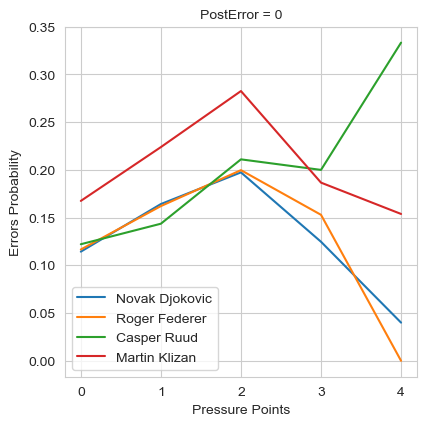

In [31]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 2)
plotstat_1 = [len(table2)/len(table1), len(table4)/len(table3), len(table6)/len(table5), len(table8)/len(table7), len(table10)/len(table9)]
plotstat_2 = [len(plot2)/len(plot1), len(plot4)/len(plot3), len(plot6)/len(plot5), len(plot8)/len(plot7), len(plot10)/len(plot9)]
plotstat_3 = [len(more2)/len(more1), len(more4)/len(more3), len(more6)/len(more5), len(more8)/len(more7), len(more10)/len(more9)]
plotstat_4 = [len(extra2)/len(extra1), len(extra4)/len(extra3), len(extra6)/len(extra5), len(extra8)/len(extra7), len(extra10)/len(extra9)]
x = np.arange(0, 5, 1)
plt.xlabel("Pressure Points")
plt.ylabel("Errors Probability")
plt.title("PostError = 0", size=10)
sns.set_style("whitegrid")
ax.plot(x, plotstat_2, label='Novak Djokovic')
ax.plot(x, plotstat_3, label='Roger Federer')
ax.plot(x, plotstat_1, label='Casper Ruud')
ax.plot(x, plotstat_4, label='Martin Klizan')
plt.legend()
plt.savefig("../plots/errors_stat.png")
plt.show()